Carga de paquetes (y en el colab meter la imagen, habrá que quitar lo del google colab)

In [1]:
import cv2 
#import easyocr #OCR que igual ni usamos
import pytesseract  # El ocr bueno
import matplotlib.pyplot as plt
import shutil
import os
import random
import numpy as np
import pywt
import pywt.data
from scipy.ndimage import rotate
try:
 from PIL import Image
except ImportError:
 import Image
 
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Adjust the path based on your installation location
#reader = easyocr.Reader(['hi','en'])


In [2]:

# Load image
original = Image.open("data\images\Hola_Mundo.jpeg")

In [3]:
grayscale_original = original.convert("L")
LL = np.array(grayscale_original)
alt, anch = LL.shape
print(alt, anch)

2016 1512


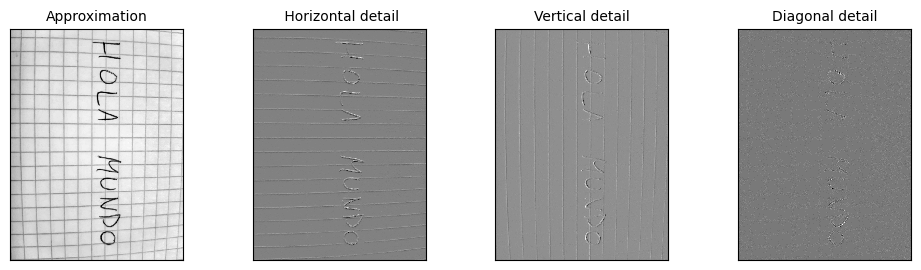

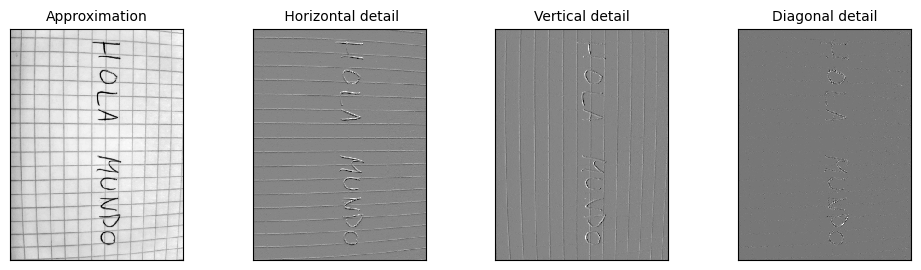

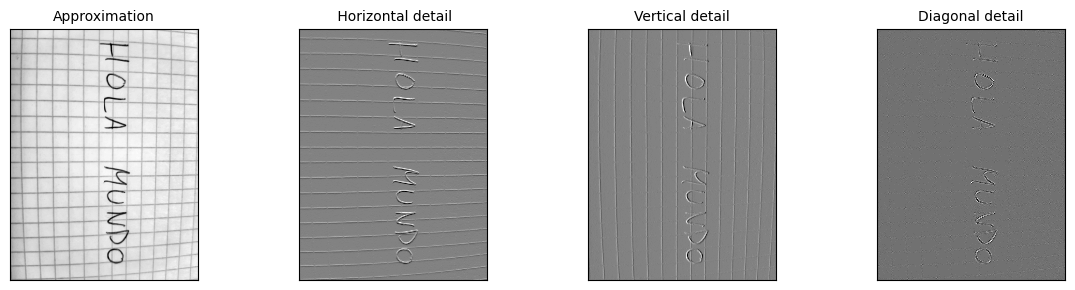

In [4]:

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
num_it = 3
for j in range(0, num_it):
    coeffs2 = pywt.dwt2(LL, "haar")
    LL, (LH, HL, HH) = coeffs2
    fig = plt.figure(figsize=(12, 3))
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(1, 4, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

fig.tight_layout()
plt.show()

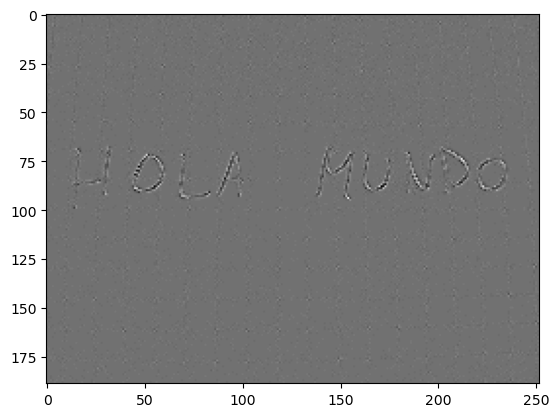

In [5]:
#cojo HH porque he escrito sobre una libreta de cuadritos y así me quito las líneas, lo suyo sería escribir sobre blanco y pillar HL o LH
HHR = rotate(HH, 90, reshape = True) #rota la imagen
plt.imshow(HHR, cmap='gray')
plt.show()

imagen_OCR = HHR.copy()

In [6]:
print(imagen_OCR.shape)

(189, 252)


ocr easyocr para detectar texto directamente (mejor):

ocr pytesseract para sacar imagenes letra a letra:

In [14]:
image_path_in_colab= "data\images\WhatsApp Image 2023-11-17 at 12.08.26.jpeg"
image = cv2.imread(image_path_in_colab)
type(image)

numpy.ndarray

In [16]:
imagen_OCR

array([[-5.87500000e+00,  1.25000000e-01, -3.75000000e-01, ...,
        -5.87500000e+00, -2.50000000e-01,  9.12500000e+00],
       [ 2.50000000e-01,  1.25000000e-01, -3.91464497e-14, ...,
         7.77606582e-16,  2.50000000e-01,  2.50000000e-01],
       [-8.53943503e-16,  2.05729664e-15, -2.18077034e-15, ...,
        -1.58854223e-13, -5.75000000e+00,  1.18750000e+01],
       ...,
       [-1.12517981e-15, -1.25000000e-01, -6.00000000e+00, ...,
        -5.50000000e+00, -3.75000000e-01, -5.37500000e+00],
       [ 5.69228486e-16, -2.50000000e-01,  5.75000000e+00, ...,
        -5.28893299e-16, -1.14659187e-15, -5.75000000e+00],
       [-1.41636369e-15,  5.75000000e+00,  6.56586815e-17, ...,
         1.76550729e-16, -1.25000000e-01,  6.00000000e+00]])

In [17]:
image

array([[[240, 220, 219],
        [240, 220, 219],
        [241, 221, 220],
        ...,
        [ 96, 107, 127],
        [ 95, 106, 126],
        [ 95, 106, 126]],

       [[240, 220, 219],
        [240, 220, 219],
        [241, 221, 220],
        ...,
        [ 98, 109, 129],
        [ 96, 107, 127],
        [ 96, 107, 127]],

       [[240, 220, 219],
        [240, 220, 219],
        [241, 221, 220],
        ...,
        [100, 111, 131],
        [ 98, 109, 129],
        [ 97, 108, 128]],

       ...,

       [[218, 214, 220],
        [218, 214, 220],
        [218, 214, 220],
        ...,
        [165, 171, 182],
        [166, 172, 183],
        [167, 173, 184]],

       [[218, 214, 220],
        [218, 214, 220],
        [218, 214, 220],
        ...,
        [165, 171, 182],
        [166, 172, 183],
        [166, 172, 183]],

       [[218, 214, 220],
        [218, 214, 220],
        [218, 214, 220],
        ...,
        [165, 171, 182],
        [166, 172, 183],
        [166, 172, 183]]

In [8]:
# Convertir a escala de grises
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización o técnicas de binarización si es necesario

# Aplicar un filtro de suavizado o técnicas de eliminación de ruido si es necesario

# Detección de bordes con el algoritmo Canny
imagen_OCR = cv2.convertScaleAbs(imagen_OCR)
edged_image = cv2.Canny(imagen_OCR, threshold1=30, threshold2=200)  # Ajusta los valores de umbral según tu imagen

# Encuentra los contornos en la imagen de bordes
contours, _ = cv2.findContours(edged_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Recorrer los contornos identificados
for i,contour in enumerate(contours):
    # Obtener las coordenadas y dimensiones de cada contorno
    x, y, w, h = cv2.boundingRect(contour)

    # Recortar la región con la letra
    letter_region = imagen_OCR[y:y+h, x:x+w]

    # Aplicar OCR para reconocimiento de texto en la región
    text = pytesseract.image_to_string(letter_region, lang='eng')

    # Guardar la imagen de la letra y el texto reconocido
    cv2.imwrite(f'data\images\letra_{i}.png'.format(text), letter_region)

ocr easyocr para sacar imagenes letra a letra:

In [21]:
imagen = cv2.imread("data\images\letra_16.png")
imagen = cv2.resize(imagen, (28, 28))
ancho, alto, can = imagen.shape
cv2.imwrite(f'data\images\letra_O.png', imagen)
print(alto, ancho)


28 28
